In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Cereals/cereals.csv')

In [3]:
data.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


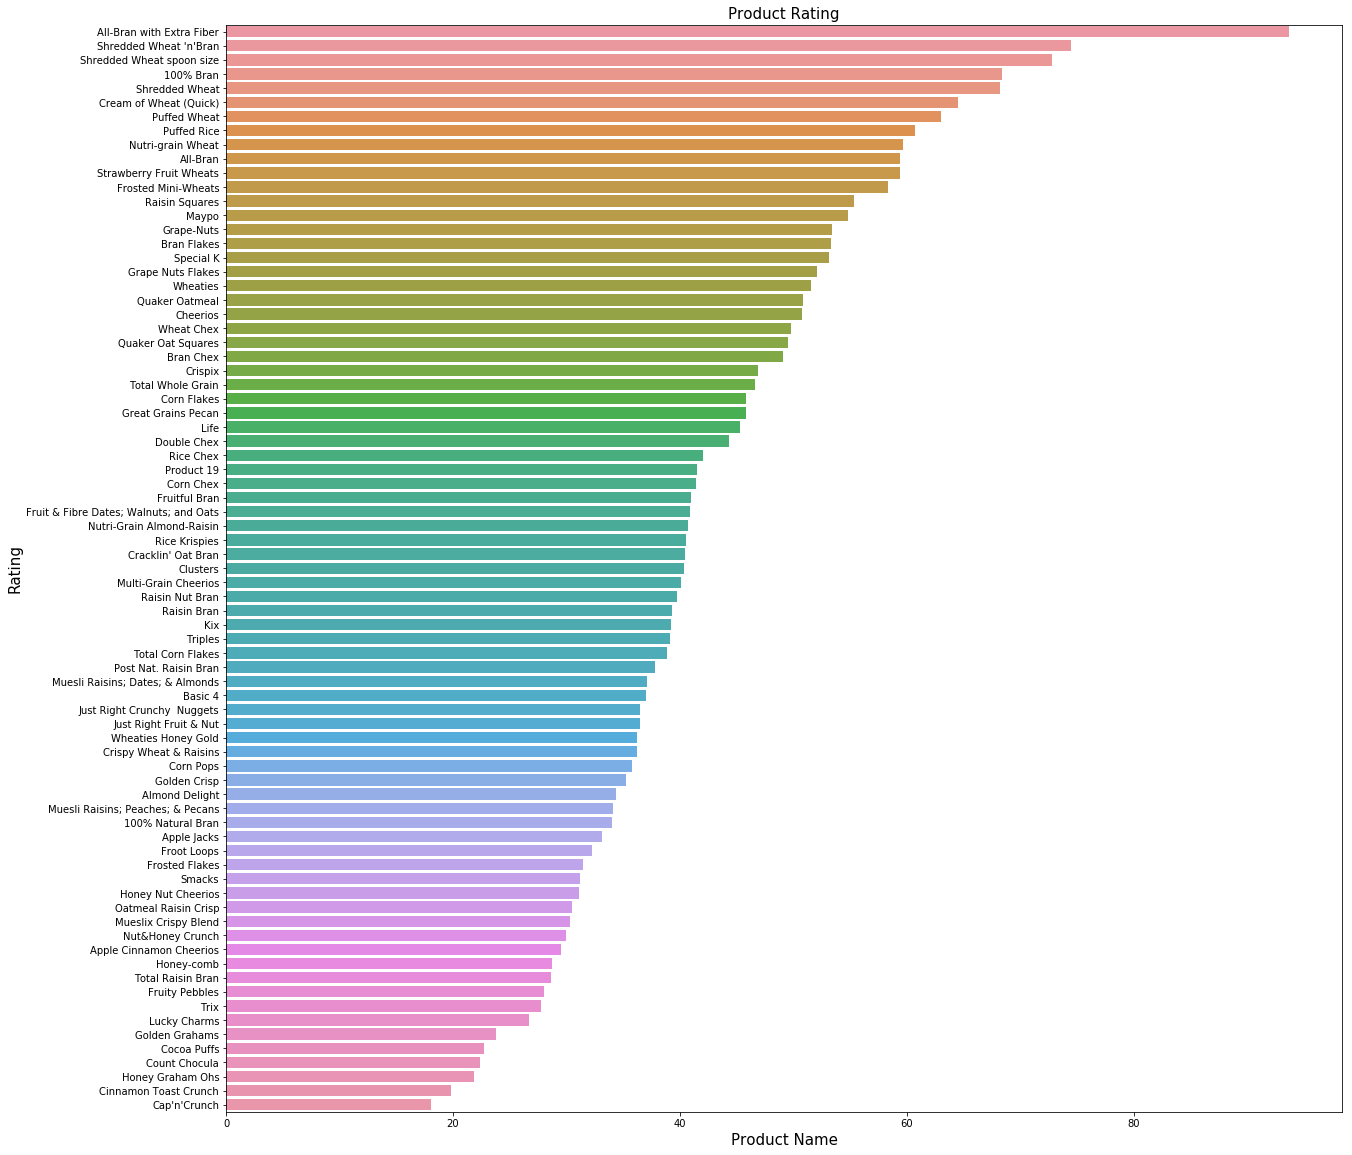

In [4]:
# Visualization product ranking
data = data.sort_values(['rating'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=data["rating"],y=data["name"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Product Rating",fontsize=15)
plt.show()

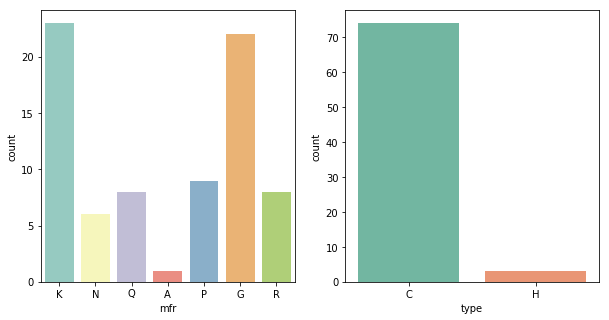

In [5]:
# Barcharts to understand the categorical variables
f, axes = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x="mfr", data=data, ax=axes[0], palette="Set3")
sns.countplot(x="type", data=data, ax=axes[1], palette="Set2")

In [6]:
data.drop(['name'], axis = 1, inplace = True)

In [7]:
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
1,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
2,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
3,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
4,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
73,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
74,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292
75,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573


In [8]:
from sklearn.utils import shuffle
data = shuffle(data)
data.dropna(inplace=True)

In [9]:
list(data.mfr.unique())

['K', 'G', 'P', 'N', 'Q', 'R', 'A']

In [10]:
list(data.type.unique())

['C', 'H']

In [11]:
data.mfr.replace(dict(zip(list(data.mfr.unique()), range(7))), inplace=True)
data.type.replace(dict(zip(list(data.type.unique()), range(2))), inplace=True)

In [12]:
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
48,0,0,110,2,1,170,1.0,17.0,6,60,100,3,1.00,1.00,36.523683
9,0,0,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
65,1,0,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
53,2,0,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
44,1,0,110,2,1,200,0.0,21.0,3,35,100,3,1.00,1.00,38.839746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0,0,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
56,4,0,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
14,2,0,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007
23,5,0,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253


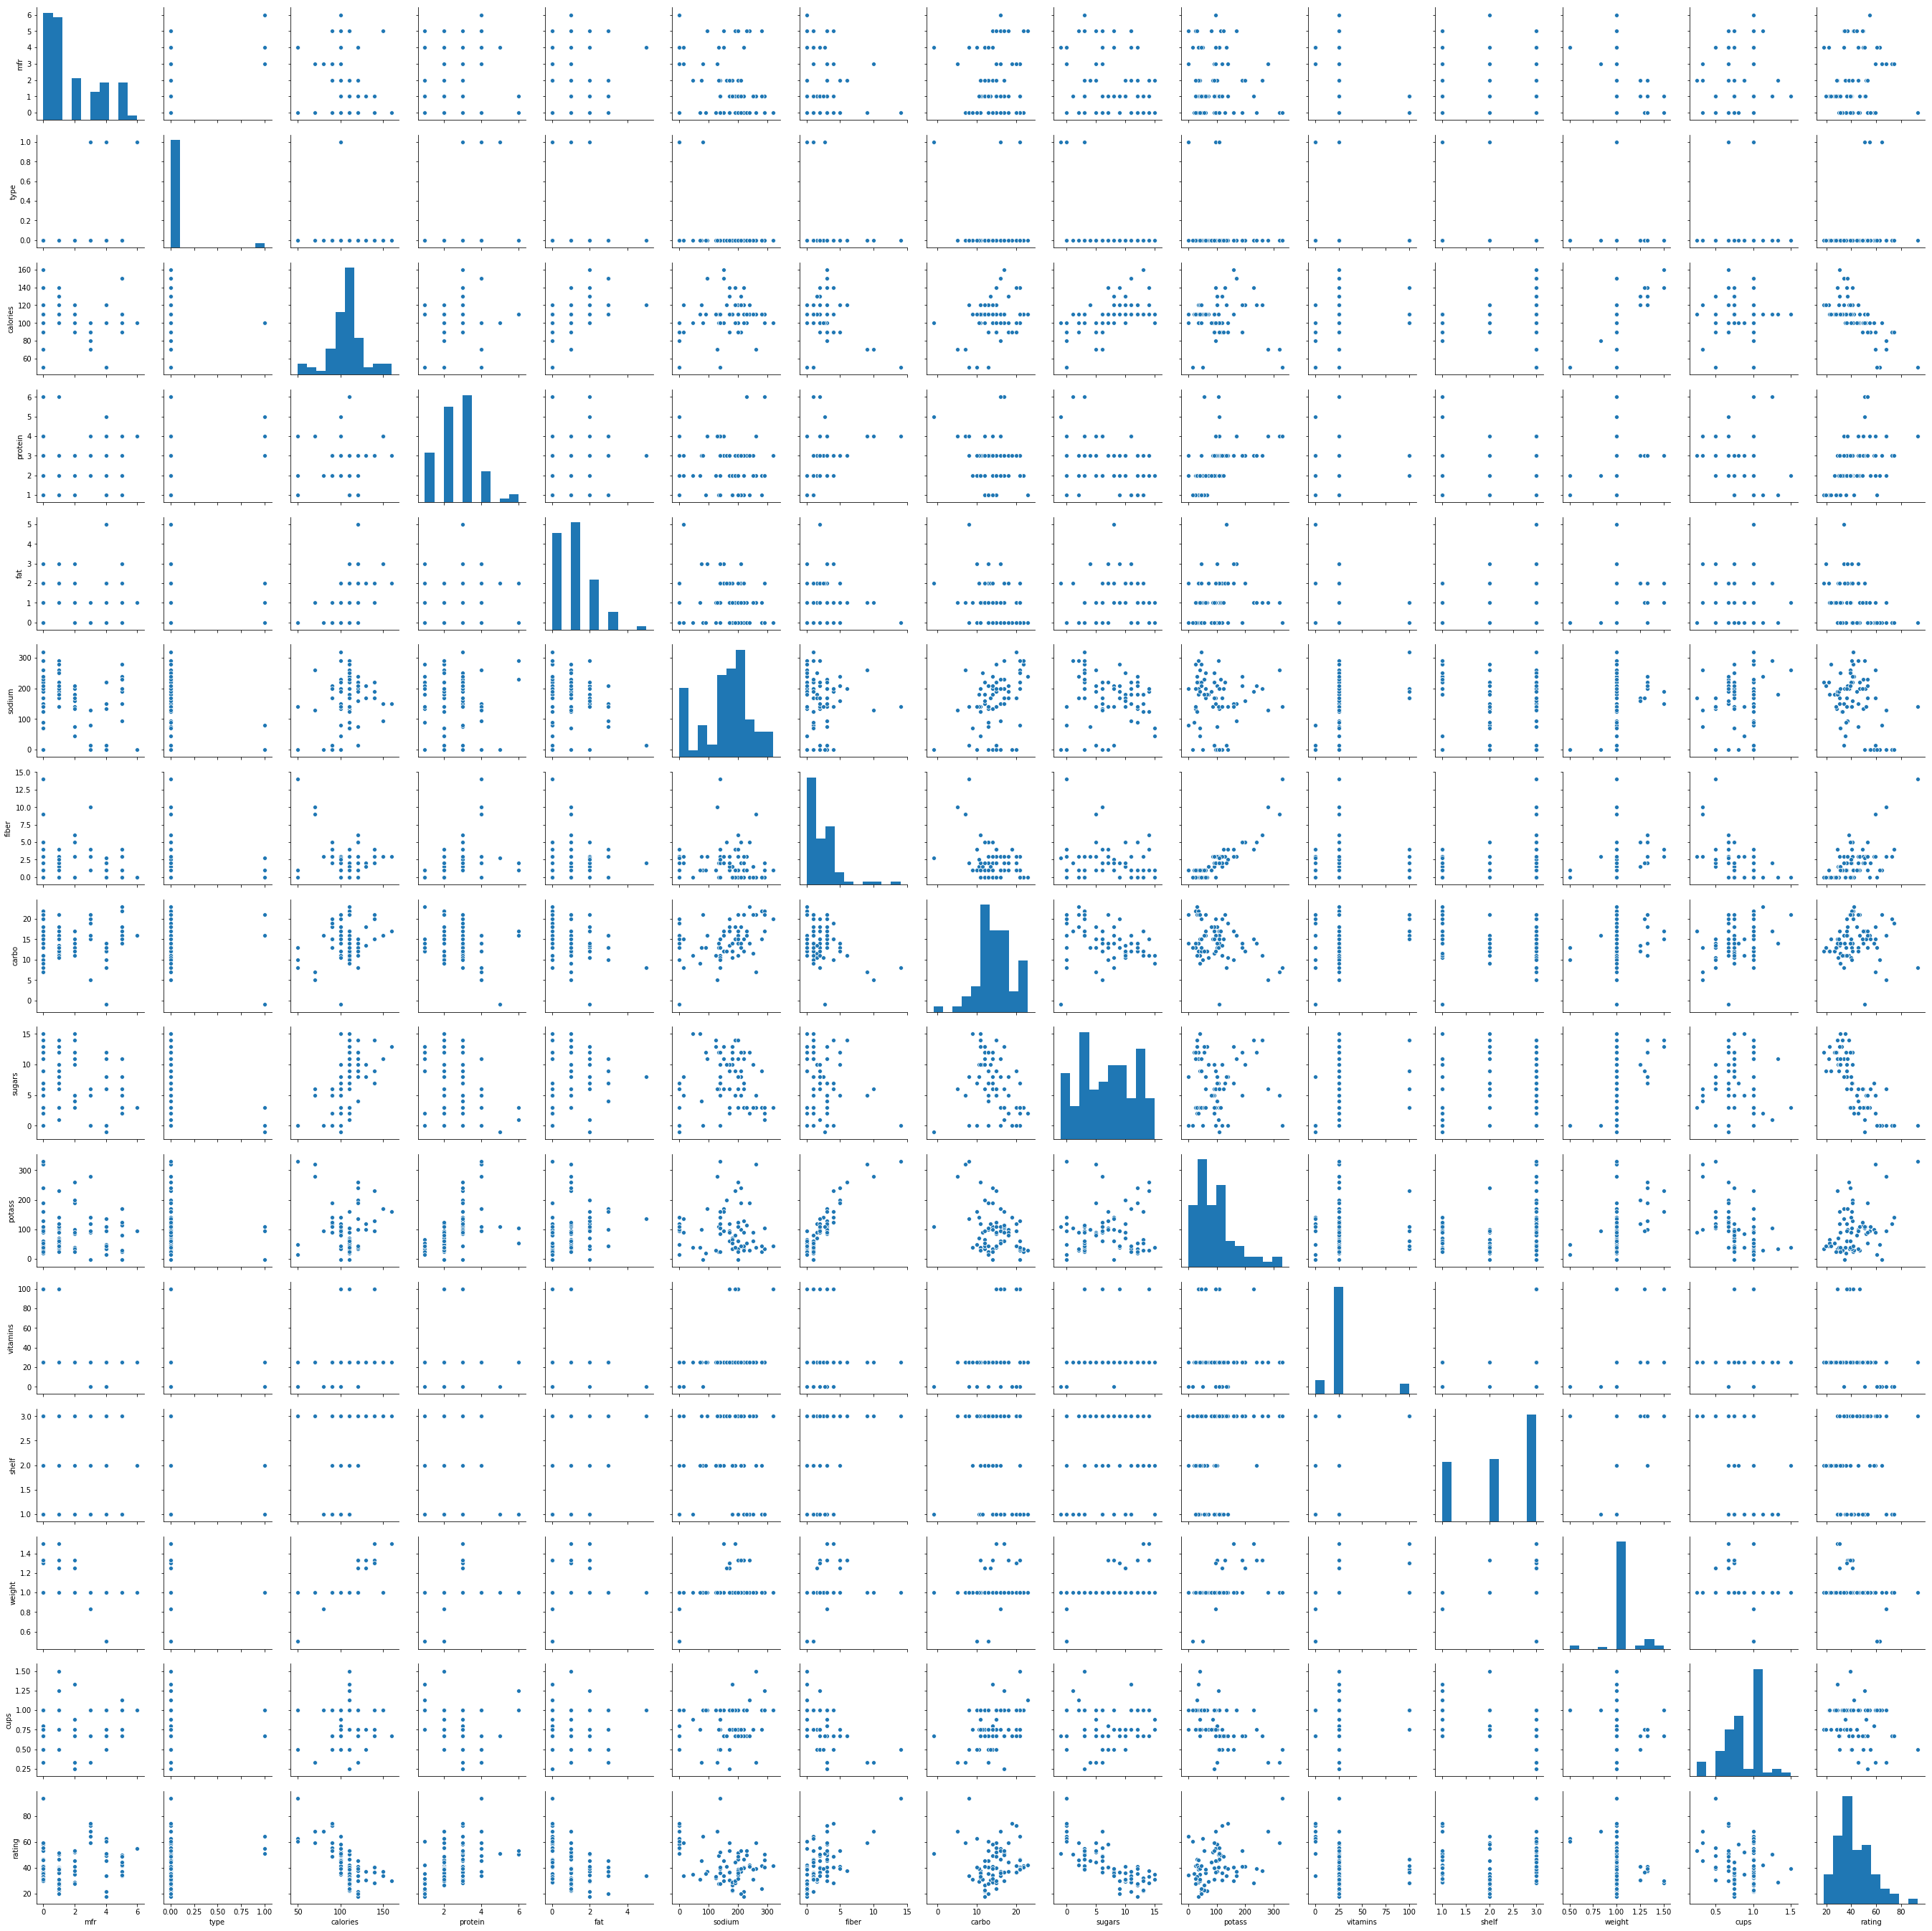

In [13]:
sns.pairplot(data)

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)

In [15]:
def x_y_split(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return np.array(x, dtype=float), np.array(y, dtype=float)

In [16]:
x_train, y_train = x_y_split(train)
x_test, y_test = x_y_split(test)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['acc']
)

In [19]:
history = model.fit(
    x_train,
    y_train,
    epochs = 100
)

Train on 57 samples
Epoch 1/100
57/57 [==============================] - 1s 10ms/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 2/100
57/57 [==============================] - 0s 196us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 3/100
57/57 [==============================] - 0s 175us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 4/100
57/57 [==============================] - 0s 181us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 5/100
57/57 [==============================] - 0s 188us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 6/100
57/57 [==============================] - 0s 175us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 7/100
57/57 [==============================] - 0s 180us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 8/100
57/57 [==============================] - 0s 188us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 9/100
57/57 [==============================] - 0s 172us/sample - loss: 5.0233e-06 - acc: 0.0000e+00
Epoch 10/100
57/57 [=======

In [20]:
import sklearn
regressor = sklearn.linear_model.Ridge()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.9998625177858789

In [21]:
regressor = sklearn.linear_model.Lasso()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.9697886974860044

In [22]:
regressor = sklearn.linear_model.LassoLars(alpha = 0.0001)
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.9999997016029244

In [23]:
print("Model accuracy by Lasso model fit with Least Angle Regression is", regressor.score(x_test, y_test)) 

Model accuracy by Lasso model fit with Least Angle Regression is 0.9999997016029244
